In [2]:
import pandas as pd

df = pd.read_csv("bank.csv")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# Generate a synthetic dataset with 3-4 clusters using Scikit-Learn's make_blobs function.

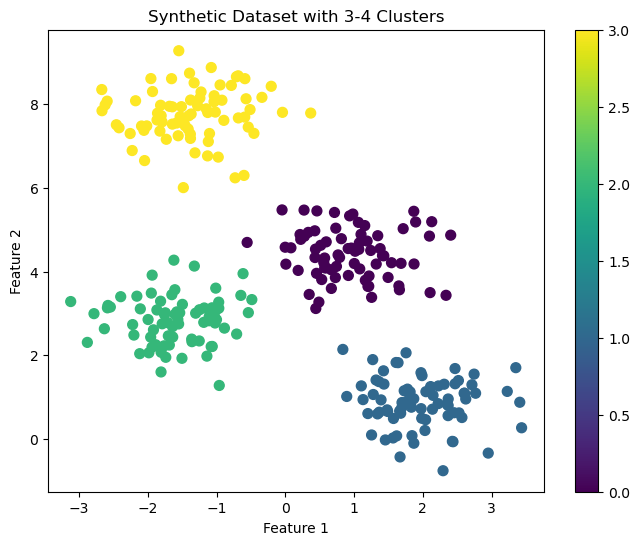

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic dataset with 3-4 clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Plot the generated dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Synthetic Dataset with 3-4 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Implement K-Means clustering algorithm on the generated dataset with varying values of K, i.e., 2, 3, 4, and visualize the resulting clusters using Matplotlib.

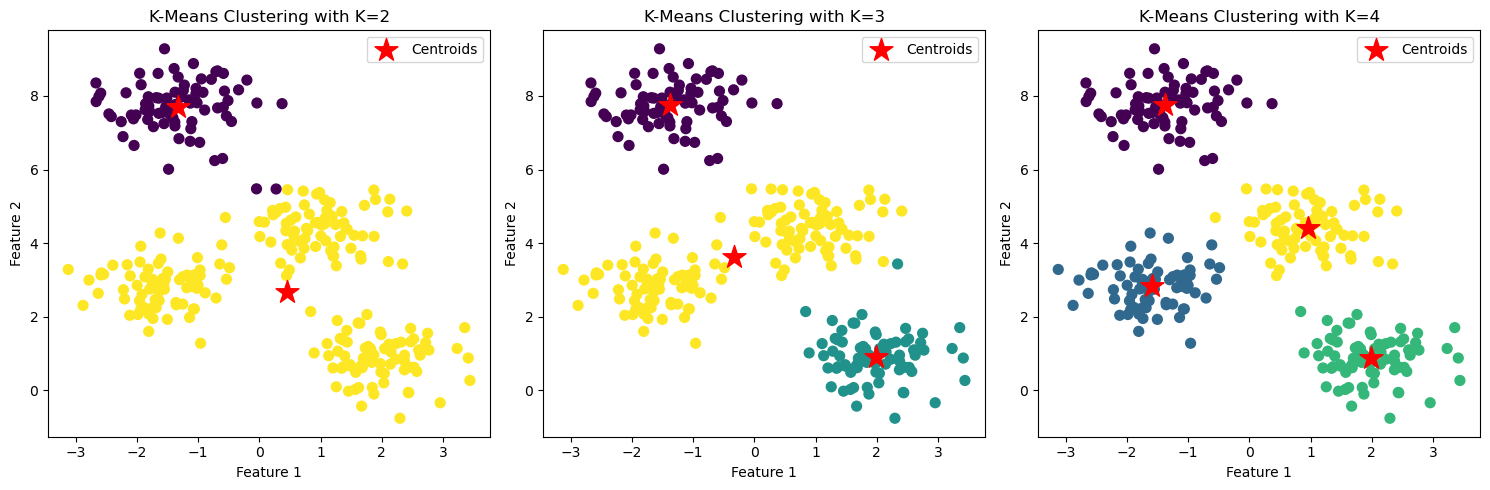

In [7]:
from sklearn.cluster import KMeans
import warnings

# Suppress FutureWarning related to n_init
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your code for generating synthetic dataset and clustering
# Generate synthetic dataset with 3-4 clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# List of values of K
k_values = [2, 3, 4]

# Visualize the resulting clusters for each value of K
fig, axs = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, k in enumerate(k_values):
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, n_init=10)  # Set n_init explicitly
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    
    # Visualize the clusters
    axs[i].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    axs[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')
    axs[i].set_title(f'K-Means Clustering with K={k}')
    axs[i].set_xlabel('Feature 1')
    axs[i].set_ylabel('Feature 2')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Evaluate the K-Means model using Silhouette score and determine the
# optimal number of clusters.

Optimal number of clusters: 4
Silhouette score for optimal number of clusters: 0.6819938690643478


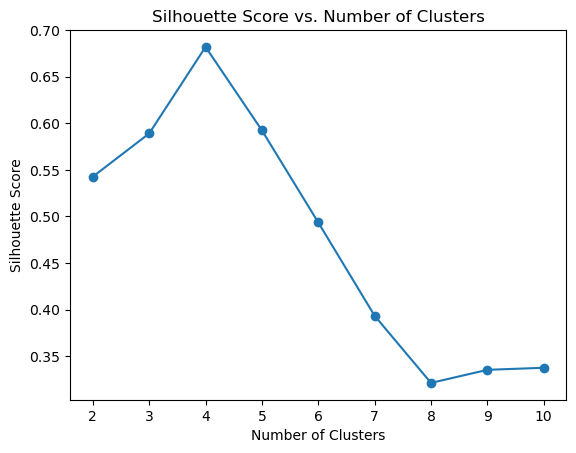

In [8]:
from sklearn.metrics import silhouette_score

# Generate synthetic dataset with 3-4 clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# List of values of K
k_values = range(2, 11)  # Try different numbers of clusters from 2 to 10

# Evaluate silhouette score for each value of K
silhouette_scores = []

for k in k_values:
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters with the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
optimal_score = max(silhouette_scores)

print(f'Optimal number of clusters: {optimal_k}')
print(f'Silhouette score for optimal number of clusters: {optimal_score}')

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

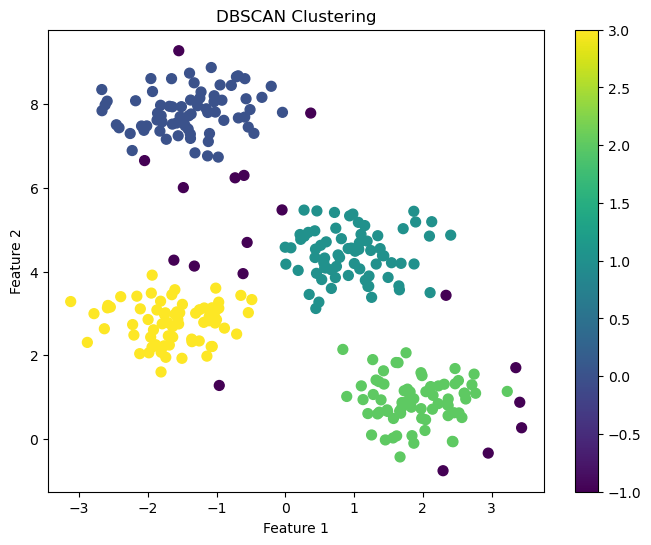

In [9]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate synthetic dataset with 3-4 clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(X)

# Visualize the resulting clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# Experiment with different values of hyperparameters, i.e., eps and
# min_samples, and observe their effect on the resulting clusters. 7. Compare
# the performance and limitations of K-Means and DBSCAN algorithms and
# provide your insights.

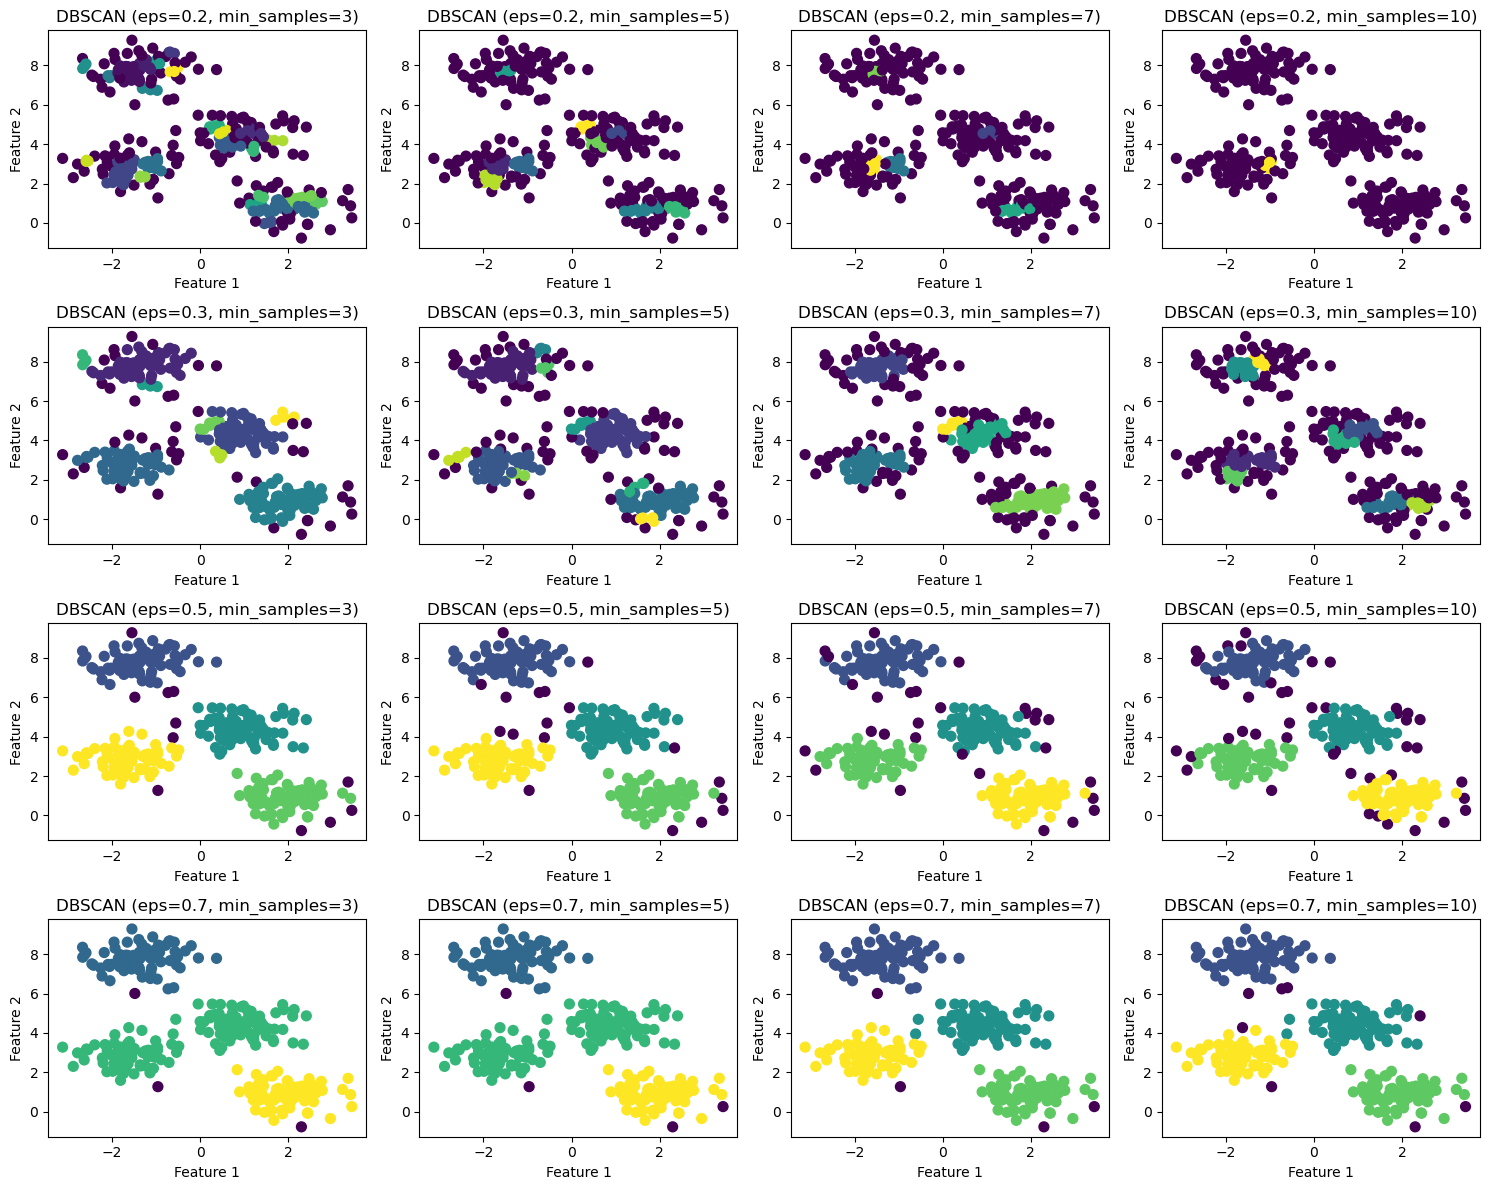

In [10]:
import numpy as np

# Define a range of values for eps and min_samples
eps_values = [0.2, 0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7, 10]

# Perform DBSCAN clustering with different hyperparameters
fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 12))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Apply DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)
        
        # Visualize the resulting clusters
        axs[i, j].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
        axs[i, j].set_title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
        axs[i, j].set_xlabel('Feature 1')
        axs[i, j].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()